In [24]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import walk

testpath = 'imagens_vq/teste'
testfiles = next(walk(testpath), (None, None, []))[2]

recpath = 'imagens_vq/rec'
recfiles = next(walk(recpath), (None, None, []))[2]

Populating the interactive namespace from numpy and matplotlib


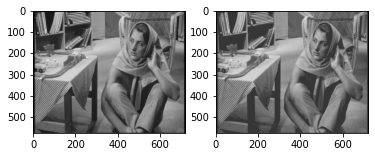

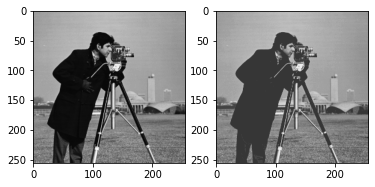

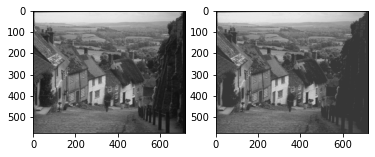

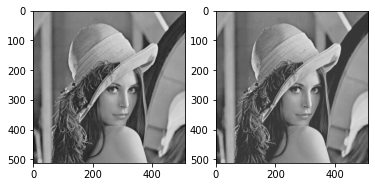

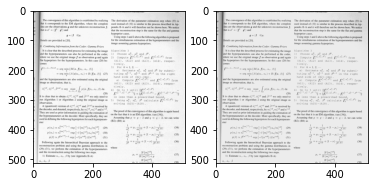

In [25]:
for i in range(0, len(testfiles)):
    f, axarr = plt.subplots(1,2)
    img = mpimg.imread(testpath + '/' + testfiles[i])
    axarr[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    img2 = mpimg.imread(recpath + '/' + recfiles[i])
    axarr[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
    plt.show()